In [1]:
from alethia import alethia

In [2]:
import pandas as pd

df = pd.read_csv(
    "~/github/pranav-alethia/notebooks/data_district_mappings/India_district_mappings - Sheet1.csv"
)
df

,State,1951,1961,1971,1981,1991,2001
0,Andaman and Nicobar Islands,Andaman and Nicobar,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands
1,Andaman and Nicobar Islands,Andaman and Nicobar,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman,Andaman,Andaman
2,Andaman and Nicobar Islands,Andaman and Nicobar,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Nicobar,Nicobar,Nicobar
3,Andhra Pradesh,Srikakulam,Srikakulam,Srikakulam,Srikakulam,Srikakulam,Srikakulam
4,Andhra Pradesh,Srikakulam,Srikakulam,Srikakulam,Vizianagaram,Vizianagaram,Vizianagaram
...,...,...,...,...,...,...,...
631,West Bengal,Burdwan,Burdwan,Burdwan,Burdwan,Burdwan,Burdwan
632,West Bengal,Birbhum,Birbhum,Birbhum,Birbhum,Birbhum,Birbhum
633,West Bengal,Bankura,Bankura,Bankura,Bankura,Bankura,Bankura
634,West Bengal,Midnapur,Midnapore,Midnapore,Midnapore,Midnapore,Midnapore


In [3]:
target_list = list(df["2001"])
correct_entries = target_list
reference_entries = [x for x in list(set(target_list)) if str(x) != "nan"]

In [ ]:
col = "1951"
incorrect_entries = df[col].tolist()
alethia_output = alethia(incorrect_entries, reference_entries)

Initializing model Salesforce/SFR-Embedding-Mistral
Loading model Salesforce/SFR-Embedding-Mistral


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

GPU memory error: CUDA out of memory. Tried to allocate 224.00 MiB. GPU 0 has a total capacity of 47.41 GiB of which 208.56 MiB is free. Process 2064024 has 26.82 GiB memory in use. Including non-PyTorch memory, this process has 17.37 GiB memory in use. Of the allocated memory 17.11 GiB is allocated by PyTorch, and 1.38 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)
Trying to load model on CPU instead...


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Successfully loaded model Salesforce/SFR-Embedding-Mistral on CPU


Initial resource usage:
CPU Usage: 6.9%
RAM Usage: 20.6%
GPU: NVIDIA RTX A6000
GPU Memory Usage: 0.00GB / 47.41GB
Computing reference embeddings for 584 entries...


In [ ]:
alethia_output[alethia_output.given_entity != alethia_output.alethia_prediction]

# Plotting examples

In [ ]:
from alethia import load_sentence_transformer

model = load_sentence_transformer("Salesforce/SFR-Embedding-Mistral")

Loading model Salesforce/SFR-Embedding-Mistral


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Successfully loaded model: Salesforce/SFR-Embedding-Mistral


In [ ]:
import pandas as pd

df = pd.read_csv(
    "~/github/pranav-alethia/notebooks/data_district_mappings/India_district_mappings - Sheet1.csv"
)
df

,State,1951,1961,1971,1981,1991,2001
0,Andaman and Nicobar Islands,Andaman and Nicobar,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands
1,Andaman and Nicobar Islands,Andaman and Nicobar,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman,Andaman,Andaman
2,Andaman and Nicobar Islands,Andaman and Nicobar,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Nicobar,Nicobar,Nicobar
3,Andhra Pradesh,Srikakulam,Srikakulam,Srikakulam,Srikakulam,Srikakulam,Srikakulam
4,Andhra Pradesh,Srikakulam,Srikakulam,Srikakulam,Vizianagaram,Vizianagaram,Vizianagaram
...,...,...,...,...,...,...,...
631,West Bengal,Burdwan,Burdwan,Burdwan,Burdwan,Burdwan,Burdwan
632,West Bengal,Birbhum,Birbhum,Birbhum,Birbhum,Birbhum,Birbhum
633,West Bengal,Bankura,Bankura,Bankura,Bankura,Bankura,Bankura
634,West Bengal,Midnapur,Midnapore,Midnapore,Midnapore,Midnapore,Midnapore


In [ ]:
from alethia import get_embedding, plot_embedding, do_pca, do_umap

india_districts = pd.read_csv(
    "/home/saket/github/climate_and_birth/all_data/shape_data/India_all_state_districts.csv"
)
districts_to_keep = india_districts.dtname.value_counts()
districts_to_keep = districts_to_keep[districts_to_keep < 2]

reference_entries = set(india_districts["dtname"])
reference_entries = districts_to_keep.index.tolist()
india_districts_reduced = india_districts[
    india_districts.dtname.isin(districts_to_keep.index.tolist())
]
import seaborn as sns

palette = (
    list(sns.color_palette("tab20"))
    + list(sns.color_palette("Set3", 12))
    + list(sns.color_palette("Dark2", 8))
)

palette = palette[:36]
valid_df = india_districts_reduced[
    india_districts_reduced["dtname"].isin(reference_entries)
].copy()
unique_states = valid_df["stname"].unique()
color_map = dict(zip(unique_states, palette))
labels = valid_df["dtname"].tolist()
states = valid_df["stname"].tolist()

In [ ]:
embedding = get_embedding(
    input_list=labels, st_model=model, return_labels=False, show_progress=True
)

Generating Embeddings: 100%|██████████| 775/775 [00:44<00:00, 17.49it/s]


In [ ]:
# target_list = list(df["2001"])
# correct_entries = target_list
# reference_entries = [x for x in list(set(target_list)) if str(x)!="nan"]#
#
# embedding = get_embedding(input_list=reference_entries, st_model=model, return_labels=False)

In [ ]:
pca = do_pca(embedding)

In [ ]:
pca, exp_var = do_pca(embedding, return_expl_var=True)

In [ ]:
umap = do_umap(embedding)

/home/saket/.local/share/mamba/envs/alethia2/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/saket/.local/share/mamba/envs/alethia2/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
len(states)

775

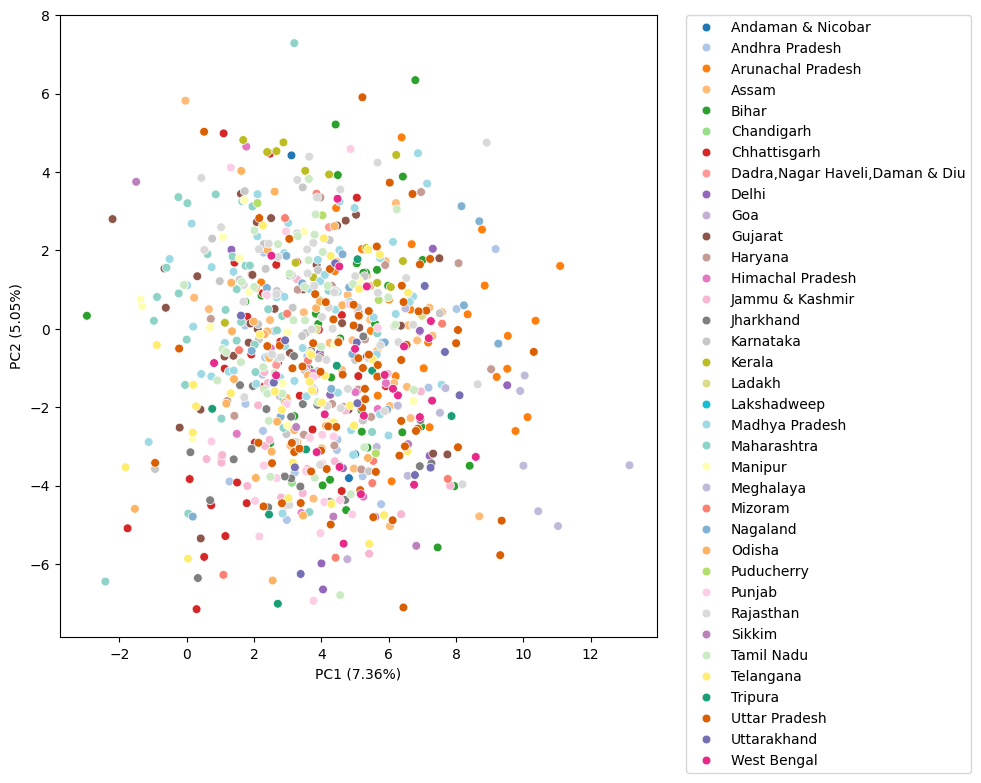

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plot_embedding(
    pca, labels=states, dims=[1, 2], color_map=palette, title="", explained_var=exp_var
)

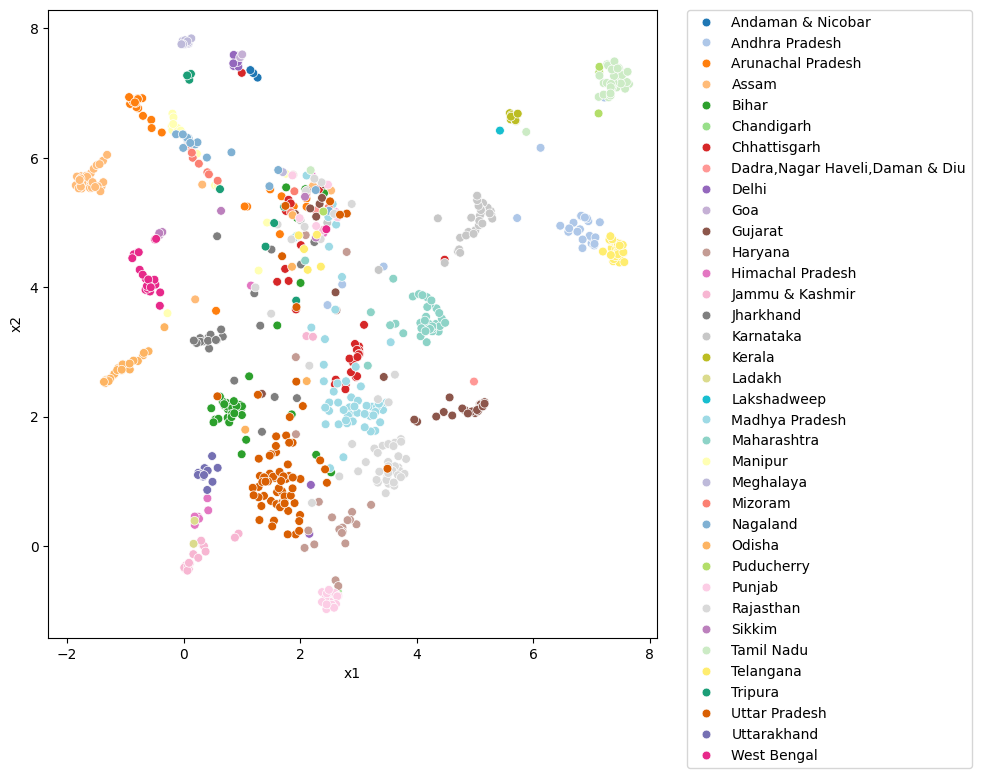

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plot_embedding(umap, labels=states, dims=[1, 2], color_map=palette, title="")